# COVID-19 INDIA Matplotlib Overview

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide
dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')
states=dft_cases['states'].unique()
df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

In [3]:
#hide
list=df['Date'].unique()
recent_dates1=list[153:]
recent_dates = []
for date in recent_dates1:
    if int(date[5])==0 and int(date[6])==7:
        date2 = f'{date[8]}{date[9]}-Jul-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==8:
        date2 = f'{date[8]}{date[9]}-Aug-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==9:
        date2 = f'{date[8]}{date[9]}-Sep-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==0:
        date2 = f'{date[8]}{date[9]}-Oct-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Nov-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Dec-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Jan-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Feb-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==3:
        date2 = f'{date[8]}{date[9]}-Mar-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==4:
        date2 = f'{date[8]}{date[9]}-Apr-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==5:
        date2 = f'{date[8]}{date[9]}-May-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==6:
        date2 = f'{date[8]}{date[9]}-Jun-{date[2]}{date[3]}'
        recent_dates.append(date2)

In [4]:
#hide
df2=df.groupby('Date')

In [5]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Confirmed
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_cases[recent_dates[i]]=cs    



In [6]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Deceased
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_deaths[recent_dates[i]]=cs    


In [7]:
#hide

dft_cases.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,22-Aug-20,23-Aug-20,24-Aug-20,25-Aug-20,26-Aug-20,27-Aug-20,28-Aug-20,29-Aug-20,30-Aug-20,31-Aug-20
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,2808,2860,2904,2945,2985,3018,3050,3081,3104,3132
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,345216,353111,361712,371639,382469,393090,403616,414164,424767,434771
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,3223,3263,3312,3412,3555,3633,3745,3877,4034,4112
3,Assam,0,0,0,0,0,0,0,0,0,...,89469,90741,92620,94593,96772,98808,101368,103795,105775,109041
4,Bihar,0,0,0,0,0,0,0,0,2,...,119909,122156,123383,124827,126990,128850,130848,132935,135013,136337


In [8]:
#hide
dt_today = dft_cases.columns[-1]
dt_yday = dft_cases.columns[-2]

In [9]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [10]:
#hide
df_table= pd.DataFrame(dft_cases['states'])
df_table = df_table.set_index('states')

df_table['Cases'] = dfc_cases.values
df_table['Deaths'] = dfc_deaths.values
df_table['PCases'] = dfp_cases.values
df_table['PDeaths'] = dfp_deaths.values
df_table

,Cases,Deaths,PCases,PDeaths
states,,,,
Andaman and Nicobar Islands,3132,46,3104,45
Andhra Pradesh,434771,3969,424767,3884
Arunachal Pradesh,4112,7,4034,7
Assam,109041,306,105775,296
Bihar,136337,694,135013,688
Chandigarh,4346,56,4155,52
Daman and Diu,0,0,0,0
Delhi,174748,4444,173390,4426
Goa,17418,193,17004,183


In [11]:
#hide
df_table = df_table.sort_values(by=['Cases','Deaths'],ascending = [False,False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,792541,24583,780689,24399
1,Andhra Pradesh,434771,3969,424767,3884
2,Tamil Nadu,428041,7323,422085,7231
3,Karnataka,342423,5702,335928,5589
4,Uttar Pradesh,230414,3486,225632,3423


In [12]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [13]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,792541,24583,780689,24399,11852,184,3.10
1,Andhra Pradesh,434771,3969,424767,3884,10004,85,0.91
2,Tamil Nadu,428041,7323,422085,7231,5956,92,1.71
3,Karnataka,342423,5702,335928,5589,6495,113,1.67
4,Uttar Pradesh,230414,3486,225632,3423,4782,63,1.51


In [14]:
#hide
summary=dict()
summary['updated']=dft_cases.columns[-1]
summary['since']=dft_cases.columns[-2]
summary['Cases']=df_table['Cases'].values.sum()
summary['Deaths']=df_table['Deaths'].values.sum()
summary['PCases']=df_table['PCases'].values.sum()
summary['PDeaths']=df_table['PDeaths'].values.sum()
summary['Cases (+)']=df_table['Cases (+)'].values.sum()
summary['Deaths (+)']=df_table['Deaths (+)'].values.sum()
summary

{'updated': '31-Aug-20',
 'since': '30-Aug-20',
 'Cases': 3513614,
 'Deaths': 64080,
 'PCases': 3449807,
 'PDeaths': 63299,
 'Cases (+)': 63807,
 'Deaths (+)': 781}

In [15]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [16]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [17]:
#hide
dt_cols = []
for i in range(len(dft_cases.columns)):
    dt_cols.append(dft_cases.columns[i])
dt_cols = dt_cols[1:]


In [18]:


#hide
#dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_yday, ascending = False,inplace = True)

In [19]:
#hide
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,22-Aug-20,23-Aug-20,24-Aug-20,25-Aug-20,26-Aug-20,27-Aug-20,28-Aug-20,29-Aug-20,30-Aug-20,31-Aug-20
states,,,,,,,,,,,,,,,,,,,,,
Maharashtra,0,18,6,3,3,4,4,12,10,23,...,14492,10441,11015,10425,14888,14857,14427,16286,16408,11852
Andhra Pradesh,0,0,0,0,0,2,0,2,1,1,...,10276,7895,8601,9927,10830,10621,10526,10548,10603,10004
Karnataka,0,0,1,2,5,1,0,5,6,7,...,7330,5938,5851,8161,8580,9386,8960,8324,8852,6495
Tamil Nadu,0,0,0,0,1,1,0,3,3,3,...,5980,5975,5967,5951,5958,5981,5996,6352,6495,5956
Uttar Pradesh,0,1,0,2,2,3,4,4,2,2,...,5217,5325,4601,5006,5640,5391,5405,5633,6175,4782


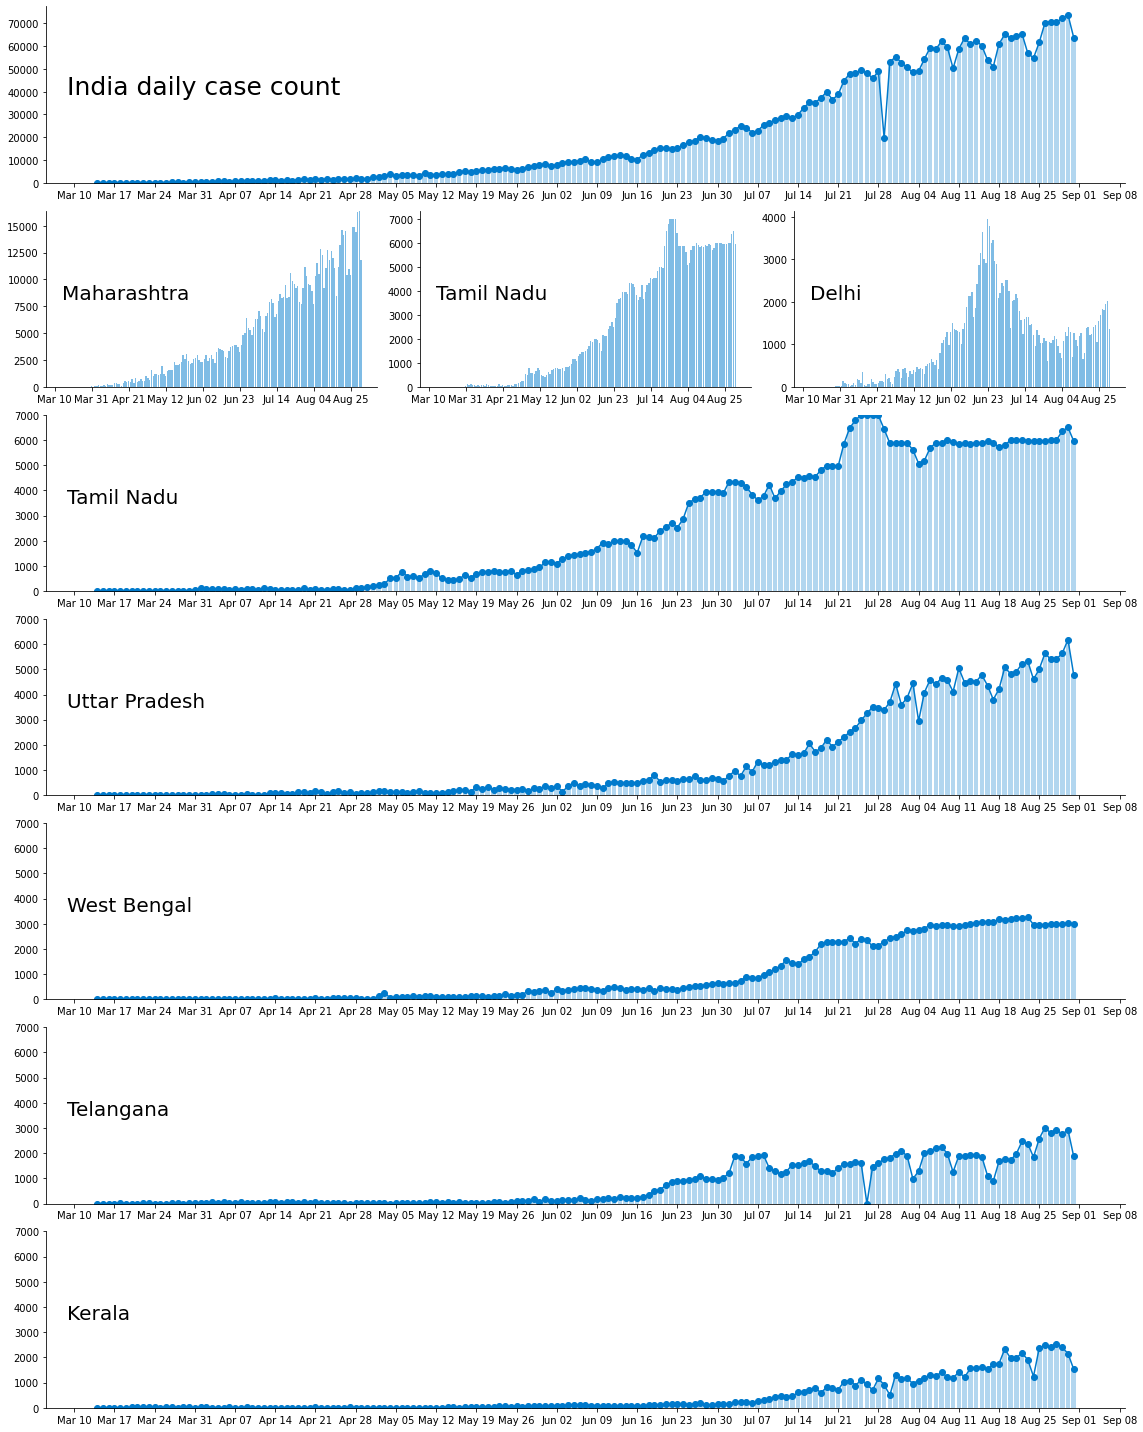

In [20]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [21]:
#hide_input
print(df_table.to_string(index=False))

                      states   Cases  Deaths  PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                 Maharashtra  792541   24583  780689    24399      11852         184           3.10
              Andhra Pradesh  434771    3969  424767     3884      10004          85           0.91
                  Tamil Nadu  428041    7323  422085     7231       5956          92           1.71
                   Karnataka  342423    5702  335928     5589       6495         113           1.67
               Uttar Pradesh  230414    3486  225632     3423       4782          63           1.51
                       Delhi  174748    4444  173390     4426       1358          18           2.54
                 West Bengal  162778    3228  159785     3176       2993          52           1.98
                       Bihar  136337     694  135013      688       1324           6           0.51
                   Telangana  124963     827  123090      818       1873           9           0.66
